In [73]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from scipy import stats
import time
import random

In [74]:
def string_conc(s):
    if s == "CTRL":
        return 0
    return int(s)

def r_string_conc(i):
    if i == 0:
        return "CTRL"
    return str(i)

PICTURE_PATH = "/Users/David_Sauer/Documents/Biophysik/diffusion-analysis/pictures/"
FIGURE_PATH = "/Users/David_Sauer/Documents/Biophysik/diffusion-analysis/figures/"
CONCENTRATIONS = [string_conc(f) for f in os.listdir(PICTURE_PATH) if (os.path.isfile(os.path.join(PICTURE_PATH, f))==False)&(str(f) != '.DS_Store')]
CONCENTRATIONS.sort()
CONCENTRATIONS_N = {c: len(os.listdir(PICTURE_PATH+r_string_conc(c)))-1 for c in CONCENTRATIONS}

In [75]:
def get_array_for_pic(concentration, number):
    path = PICTURE_PATH + str(concentration) + "/" + str(number) + "/"
    files = [os.path.join(path, f) for f in os.listdir(path) if (os.path.isfile(os.path.join(path, f)))&(str(f) != '.DS_Store')]
    arrays = {("d" if ("copy" in f) else "c"):cv2.bitwise_not(cv2.imread(f, cv2.IMREAD_GRAYSCALE)) for f in files}
    return arrays

def gen_full_dict():
    array_dict = {}
    for c in CONCENTRATIONS:
        array_dict[r_string_conc(c)] = {}
        for n in range(1,CONCENTRATIONS_N[c]+1):
            array_dict[r_string_conc(c)][n] = get_array_for_pic(r_string_conc(c), n)
    return array_dict

In [76]:
pictures = gen_full_dict()

In [77]:
def intensity(pics, conc):
    ret = []
    pics_conc = pics[conc]
    for k in pics_conc.keys():
        d = pics_conc[k]["d"].mean()
        c = pics_conc[k]["c"].mean()
        ret.append(np.log10(d/c))
    return ret

In [80]:
def plot_fit(v_1, v_2, log=True, description=True):
    fig = plt.figure()
    plt.plot(CONCENTRATIONS, [intensity(pictures,r_string_conc(n))[0] for n in CONCENTRATIONS], "b+")
    plt.plot(CONCENTRATIONS, [intensity(pictures,r_string_conc(n))[1] for n in CONCENTRATIONS], "b+")
    plt.plot(CONCENTRATIONS, [intensity(pictures,r_string_conc(n))[2] for n in CONCENTRATIONS], "b+")
    plt.plot(CONCENTRATIONS, [np.array(intensity(pictures,r_string_conc(n))).mean() for n in CONCENTRATIONS], "k-")
    slope, intercept, r_value, p_value, std_err = stats.linregress(CONCENTRATIONS[v_1:v_2], [np.array(intensity(pictures,r_string_conc(n))).mean() for n in CONCENTRATIONS[v_1:v_2]])
    plt.plot(CONCENTRATIONS[v_1:v_2], [slope*n+intercept for n in CONCENTRATIONS[v_1:v_2]])
    plt.xlabel("Dilution")
    plt.ylabel("Absorbance")    
    if log:
        print("log")
        plt.xscale("log")
    if description:
        print("Fit from 1:{} to 1:{} \nR: {}, p: {}".format(CONCENTRATIONS[v_1], CONCENTRATIONS[len(CONCENTRATIONS)+v_2], r_value, p_value))
    fig.savefig(FIGURE_PATH + str(int(time.time())) + "_" + str(random.randint(0,100) + ".png", dpi=500)
    del fig

SyntaxError: invalid syntax (<ipython-input-80-04f378442b8b>, line 17)

log
Fit from 1:16 to 1:128 
R: -0.994000974527466, p: 0.06976744600761466


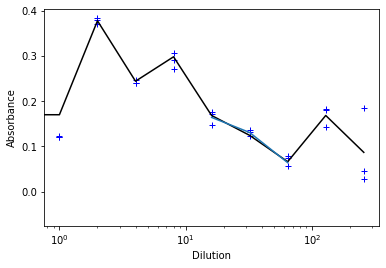

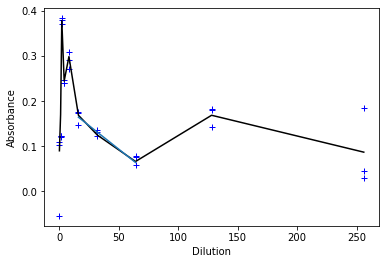

In [81]:
plot_fit(5,-2)
plt.show()
plot_fit(5,-2,False, False)